<a href="https://colab.research.google.com/github/a-donat/Benchmarks_PyCaret/blob/main/Predicting_Utrecht_House_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I. Set-Up

## I.A. Import Libraries and Download Data

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d ictinstitute/utrecht-housing-dataset
! unzip '/content/utrecht-housing-dataset.zip' -d '/content/data'

In [ ]:
! pip install pycaret

In [5]:
#import matplotlib.pyplot as plt
#import seaborn as sns
#import VisualizeDataAbbrev as viz

import numpy as np
import pandas as pd
from pycaret.regression import *
from sklearn.model_selection import train_test_split

## I.B. Load Data and Check Data Integrity

In [105]:
ds_df = pd.read_csv("/content/data/utrechthousinghuge.csv")


In [106]:
ds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           2499 non-null   int64  
 1   zipcode      2499 non-null   int64  
 2   lot-len      2499 non-null   float64
 3   lot-width    2499 non-null   float64
 4   lot-area     2499 non-null   int64  
 5   house-area   2499 non-null   int64  
 6   garden-size  2499 non-null   int64  
 7   balcony      2499 non-null   int64  
 8   x-coor       2499 non-null   int64  
 9   y-coor       2499 non-null   int64  
 10  buildyear    2499 non-null   int64  
 11  bathrooms    2499 non-null   int64  
 12  taxvalue     2499 non-null   int64  
 13  retailvalue  2499 non-null   int64  
 14  energy-eff   2499 non-null   int64  
 15  monument     2499 non-null   int64  
dtypes: float64(2), int64(14)
memory usage: 312.5 KB


In [107]:
ds_df.nunique()

id             2499
zipcode           4
lot-len         736
lot-width       101
lot-area        881
house-area      170
garden-size     907
balcony           3
x-coor          883
y-coor          927
buildyear        41
bathrooms         2
taxvalue       1380
retailvalue     325
energy-eff        2
monument          2
dtype: int64

In [108]:
ds_df["zipcode"] = ds_df["zipcode"].astype(str)

In [109]:
ds_df.corr().round(2)

,id,lot-len,lot-width,lot-area,house-area,garden-size,balcony,x-coor,y-coor,buildyear,bathrooms,taxvalue,retailvalue,energy-eff,monument
id,1.00,-0.01,0.04,0.01,-0.00,0.01,0.05,0.00,-0.00,-0.00,0.01,0.01,0.01,-0.01,-0.00
lot-len,-0.01,1.00,-0.26,0.93,0.52,0.93,-0.06,0.21,-0.46,-0.08,0.26,0.88,0.88,-0.41,0.29
lot-width,0.04,-0.26,1.00,0.04,0.01,0.04,0.01,-0.00,-0.02,-0.01,0.03,0.03,0.03,-0.03,0.00
lot-area,0.01,0.93,0.04,1.00,0.55,1.00,-0.05,0.23,-0.49,-0.09,0.29,0.94,0.93,-0.44,0.31
house-area,-0.00,0.52,0.01,0.55,1.00,0.55,0.05,0.41,-0.30,0.20,0.41,0.80,0.78,-0.50,0.30
garden-size,0.01,0.93,0.04,1.00,0.55,1.00,-0.06,0.22,-0.49,-0.09,0.29,0.94,0.93,-0.44,0.31
balcony,0.05,-0.06,0.01,-0.05,0.05,-0.06,1.00,0.17,0.02,0.33,-0.02,-0.00,0.00,0.21,0.16
x-coor,0.00,0.21,-0.00,0.23,0.41,0.22,0.17,1.00,0.16,0.59,0.16,0.34,0.27,0.05,0.15
y-coor,-0.00,-0.46,-0.02,-0.49,-0.30,-0.49,0.02,0.16,1.00,0.31,-0.17,-0.52,-0.56,0.38,-0.18
buildyear,-0.00,-0.08,-0.01,-0.09,0.20,-0.09,0.33,0.59,0.31,1.00,0.02,0.03,-0.01,0.47,0.03



# II. Preprocessing

In [110]:
train_df, test_df = train_test_split(
    ds_df, test_size=0.20, random_state=1)

# III. Create Models

In [111]:
reg_models = setup(
    data=train_df, target='retailvalue', ignore_features=['id', 'taxvalue'],
    session_id=123)

,Description,Value
0,Session id,123
1,Target,retailvalue
2,Target type,Regression
3,Original data shape,"(1999, 16)"
4,Transformed data shape,"(1999, 17)"
5,Transformed train set shape,"(1399, 17)"
6,Transformed test set shape,"(600, 17)"
7,Ignore features,2
8,Numeric features,12
9,Categorical features,1


In [114]:
best_model = compare_models(fold=5)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,3476.9499,22229403.7443,4712.2607,0.9966,0.0221,0.0162,0.4800
gbr,Gradient Boosting Regressor,4131.6679,30075132.2721,5477.2217,0.9954,0.0262,0.0197,0.5100
xgboost,Extreme Gradient Boosting,4063.9837,32554847.3521,5676.9524,0.9950,0.0263,0.0190,0.3960
et,Extra Trees Regressor,4521.5918,38232588.2727,6173.6076,0.9941,0.0297,0.0214,0.7780
lr,Linear Regression,5124.9959,39980466.7561,6321.5824,0.9938,0.0318,0.0254,0.9100
lasso,Lasso Regression,5125.7002,39974267.9258,6321.1892,0.9938,0.0318,0.0254,0.1520
ridge,Ridge Regression,5123.6994,39989682.6726,6322.3416,0.9938,0.0317,0.0253,0.1400
llar,Lasso Least Angle Regression,5124.7164,39977434.7737,6321.3489,0.9938,0.0318,0.0254,0.1480
br,Bayesian Ridge,5123.8915,39989103.4677,6322.2936,0.9938,0.0317,0.0253,0.2620
rf,Random Forest Regressor,5300.4335,51429790.8136,7146.7086,0.9920,0.0346,0.0251,0.8260


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

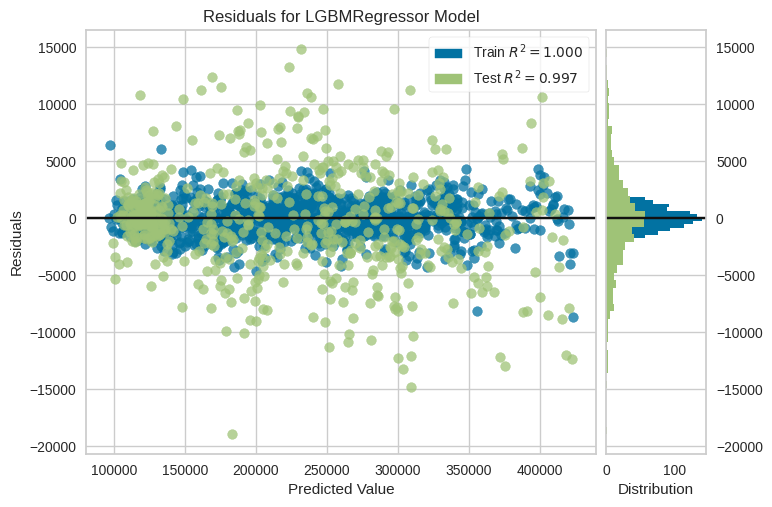

In [115]:
plot_model(best_model)